<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [23]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    4      4  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [20]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9993529197795769, 0.9987042941099483]
  * f(x_sol) = 4.1909860490578263e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
---------------------

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

Question 1)

La fonction $f_1$
est une fonctin quadratique. Son modèle de Taylor à l'ordre 2 est une approximation de cette fonction par un fonction à l'ordre 2. C'est donc exactement la même fonction, elles sont égales.
Nous allons dans maintenant comparé les performances de l'algo de newton et de celui de cauchy.

On voit que dans le cas de l'algorithme de Newton, on trouve à chaque fois le minimum en une seule itération. Ceci est du au faite que l'algorithme de newton approxime la fonction au voisinage de $x_k$ par une fonction du second ordre, qui dépend du gradient et de la hessienne de $f_1$. En l'occurence l'approximation est la fonction exacte que nous recherchons, et on trouve ainsi le point critique du premier coup.

Cependant, on voit que avec l'algorithme des regions de confiance utilisant le pas de cauchy, fait lui 34 et 33 itération pour trouver le résultat. Cela s'explique par le fait que on descend selon la pente du gradient avec un pas qui est parametré par une région de confiance. Ici, l'approximation est encore une fois parfaite car on approxime la fonction $f_1$ par u

Question 2) 
Dans un premier temps, nous allons étudier l'influence de la région de confiance initale en traçant le nombre d'itération en fonction de la région de confiance. Dans un premier temps, interessons nous a son influence sur $f_1$:

# Variation en fonction de Delta0 :

In [ ]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: 
using Plots
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

tol_erreur= 1e-2
nom="cauchy"
nb_test = 100

e= range(1, 20, length=nb_test)
n=zeros(nb_test)
for i in 1:nb_test
    _,_,_,n[i],_ = regions_de_confiance(fct1,grad_fct1,hess_fct1, pts1.x012, algo_pas=nom, Δ0=e[i], Δmax=50)
end
plot(xlabel ="delta0", ylabel = "nbIter", e,n)

Sur ce premier graphe, on voit que l'influence de $\Delta_{0}$ est importante est que, avec $f_1$, on peut monter la valeur de delta0 autant qu'on le veut. Ceci est du au fait que la fonction d'approximation est exactement la fonction $f_1$. dans les fait on pourrait donc mettre une région de confiance "infinie". Observons maintenant les résultat obtenue dans le cas ou on fait varier $\Delta_{0}$ avec la fonction $f_2$.

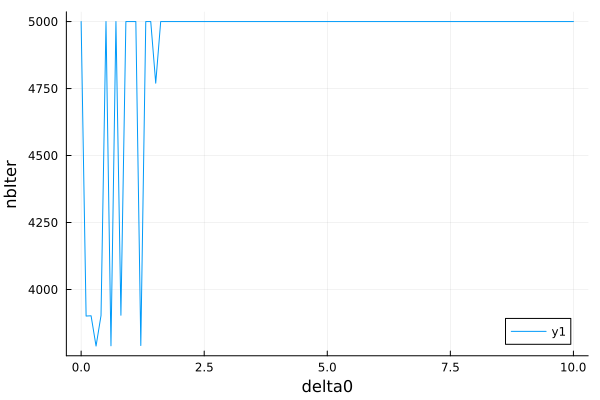

In [61]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: 
using Plots
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

tol_erreur= 1e-2
nom="cauchy"
nb_test = 100

e= range(0, 10, length=nb_test)
n=zeros(nb_test)
for i in 1:nb_test
    _,_,_,n[i],_ = regions_de_confiance(fct2,grad_fct2,hess_fct2, pts1.x023, algo_pas=nom, Δ0=e[i], Δmax=50)
end
plot(xlabel ="delta0", ylabel = "nbIter", e,n)

On voit sur ce graphique que augmenter la valeur de $\Delta_{0}$ change plus emplement le nombre d'itération. Ceci peut s'expliquer par le fait que en prenant une région de confiance trop grande, la fonction ne sera pas du tout précise et il faudra donc réduire plusieurs fois la région de confiance avant d'arriver à une région de confiance qui serait raisonable.
Pour conclure, on peut dire que $\Delta_{0}$ est une variable à choisir consciensieument en fonction de la fonction.

Après avoir étduier l'impacte de $\Delta_{0}$, nous allons maintenant voir l'impact d'autre variables. Nous considererons premièrement la variable $\gamma_{2}$, celle ci est résponsable de l'augmentation de la région de confiance dans le cas ou la fonction d'approximation $m_k$ serait trop précise.

#  Variations de $\gamma_{2}$

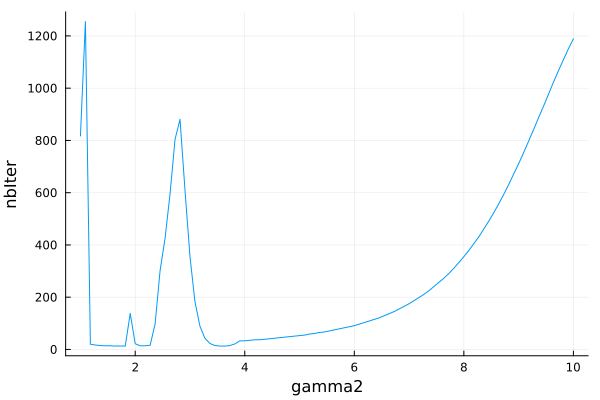

In [64]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: 
using Plots
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

tol_erreur= 1e-2
nom="cauchy"
nb_test = 100

e= range(1, 10, length=nb_test)
n=zeros(nb_test)
for i in 1:nb_test
    _,_,_,n[i],_ = regions_de_confiance(fct2,grad_fct2,hess_fct2, pts1.x022,  γ2=e[i], algo_pas=nom, Δ0=0.2, Δmax=200)
end
plot(e,n, xlabel= "gamma2", ylabel="nbIter", label =false )

On voit sur ce premier exemple que la valeur de gamma1 change grandement le nombre d'itération que nous devons faire. En effet, pour certaine valeur de $\gamma_{1}$, le nombre d'itération est très faible. Pour faire ce tests, j'ai modifier la région de confiance initale en la prenant égale à 0,2 pour que la région de confiance ne dépasse pas tout de suite la région de confiance maximale, que j'ai également augmenté à 50. Même si son impact est important, je ne sais pas comment on peut choisir sa valeur en amont. La figure suivante nous montre le nombre d'itération fait pour truover le min de la fonction $f_1$ en fonction de $\gamma_{2}$ également:

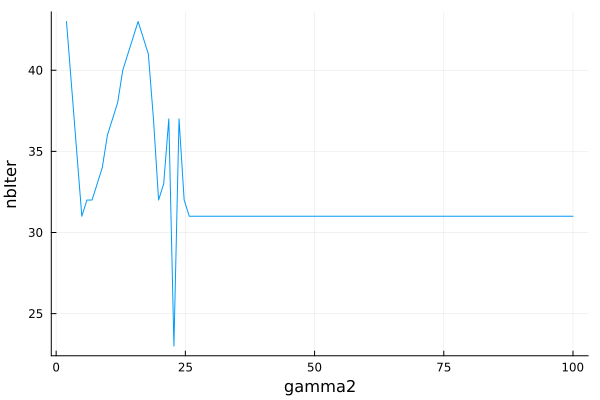

In [66]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: 
using Plots
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

tol_erreur= 1e-2
nom="cauchy"
nb_test = 100

e= range(2, 100, length=nb_test)
n=zeros(nb_test)
for i in 1:nb_test
    _,_,_,n[i],_ = regions_de_confiance(fct1,grad_fct1,hess_fct1, pts1.x012, γ2=e[i], algo_pas=nom, Δ0=0.2, Δmax=200)
end
plot(e,n, xlabel= "gamma2", ylabel="nbIter", label =false )

On voit ici que la coubre n'évolue plus pour gamma2 grand, ceci est coherent avec ce que nous avions expliqué pour la frontière initiale delta0 dans le cas de cette fonction. En effet, de faco idéal il faudrait avoir la frontière à l'infinie car la $f_1$ est un fonction quadratique, son approximation à l'ordre 2 est donc exactement égale à l'approximation $m_k$

# variation de $\gamma_{1}$


Nous allons tracer pour la fonction 1 et 2 le nombre d'itérations en fonction de $\gamma_{1}$:

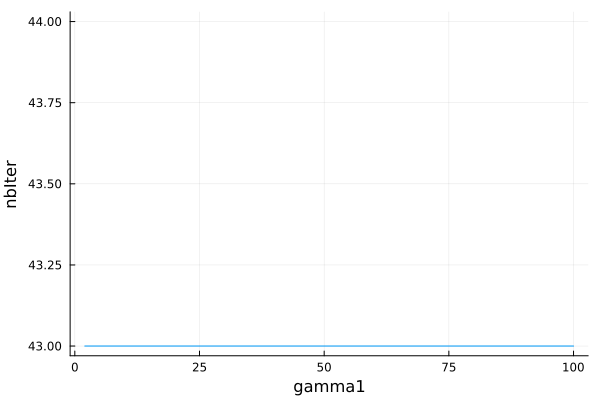

In [21]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: 
using Plots
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

tol_erreur= 1e-2
nom="cauchy"
nb_test = 100

e= range(2, 100, length=nb_test)
n=zeros(nb_test)
for i in 1:nb_test
    _,_,_,n[i],_ = regions_de_confiance(fct1,grad_fct1,hess_fct1, pts1.x012, γ1=e[i], algo_pas=nom, Δ0=0.2, Δmax=200)
end
plot(e,n, xlabel= "gamma1", ylabel="nbIter", label =false )

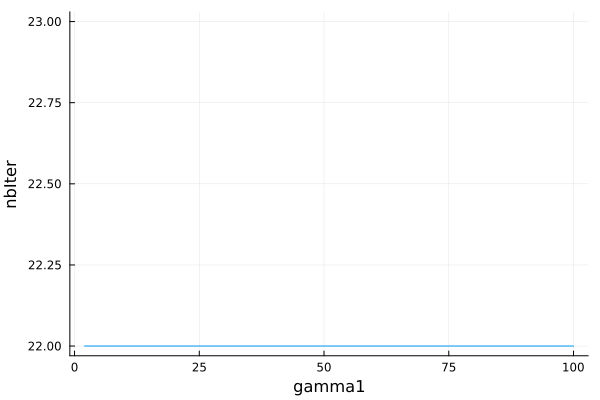

In [22]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: 
using Plots
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

tol_erreur= 1e-2
nom="cauchy"
nb_test = 100

e= range(2, 100, length=nb_test)
n=zeros(nb_test)
for i in 1:nb_test
    _,_,_,n[i],_ = regions_de_confiance(fct2,grad_fct2,hess_fct2, pts1.x022, γ1=e[i], algo_pas=nom, Δ0=0.2, Δmax=200)
end
plot(e,n, xlabel= "gamma1", ylabel="nbIter", label =false )

on peut constater que la valeurs de gamma1 n'influe pas sur le nombre d'itération pour calculer la solution. Je ne sais pas qu'elles interpretations suplémentaire faire. Je pense que dans un cas ou la fonction est très differentes de sont approximations (cas ou une fonctions ne s'approxime pas bien par son dévelopement de taylor à l'ordre 2) le paramètre $\gamma_{1}$ sera important à choisir car il permettra de modifier la région de confiance pour améliorer la précision de l'approximation dans la région de confiance. En effet, le paramètre gamma1 est celui qui permet de réduire la région de confiance. dans un cas défavorable, diminuer la région de confiance plus rapidement permettrait donc d'être plus performante.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [69]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.1s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [70]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.8s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

In [7]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

1) Dans le cas ou on force l'algorithme du gradient conjugué à ne faire qu'une itération pour chercher le pas, on obtient exactement le calcul du pas par la méthode de cauchy. Il est également à noté que la première itération est exactement la même que celle de cauchy. On peut le voir sur l'exemple ci dessous qui montre pour la fonction $f(x)=(x_1/5)²+(x_2/3)²$. Dans le premier cas, on voit que les deux courbes sont supperposé, ce qui montre bien que avec max_iter_gct=1, le gradient conjugué est exactment la même chose que le pas de cauchy. On peut remarqué dans le second cas, ou on a retirer max_iter_gct=1 que le gradient conjugué converge plus vite et que la première itération des deux algorithmes est la même

2)Dans le cas général, on voit que le calcul du pas avec le gradient conjugué est plus efficace que celui de 

3)Les avantages du pas de cauchy sont les suivants:
-Il est simple à mêttre en oeuvre et facilement compréhensible
-Il est très efficace sur les fonctions quadratique. 
Cependant, le désavantage et que il ne prend pas en compte les itérations passé pour calculer la nouvelle itération. De plus, dans le cas ou la matrice hessienne est mal conditionné comme la fonction 2, il semble avoir du mal a trouver les solutions.
Les avantages du gradient conjugué tronqués sont les suivants:
-Dans nos cas, les solutions sont plus rapidement en trouvé, en moinss d'itérations.
-Il est plus robuste lorsque nous avons des problèmes avec le conditionnement de la matrice hessienne. 
Cependant, il fait plus de calcul caché lorsqu'il calcul le pas.

In [2]:
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")
using Plots
fct=fct2
gf=grad_fct2
hf=hess_fct2
x0=x022
#courbe de niveaud de f
resolution =100
x1=range(-1,10,length=resolution)
x2=range(-1,20,length=resolution)
tabF=[fct([i,j]) for i in x1, j in x2]
color=[:lightblue, :blue, :navy, :darkblue]
heatmap_plot = heatmap(x1,x2, tabF, c =color, xlabel="x1", ylabel="x2", title ="courbe niveau", legendgontsize=5)

x_sol, f_sol, flag, nb_iters, xs_g = regions_de_confiance(fct,gf,hf, x0, algo_pas="gct", max_iter_gct =1)
x_sol, f_sol, flag, nb_iters, xs_c = regions_de_confiance(fct,gf,hf, x0, algo_pas="cauchy")
pt1= x0
pt2 = xs_g[1]

scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:red, label="algo de gct",legendfontsize=5)
for i in 1:length(xs_g)-1
    pt1=xs_g[i]
    pt2=xs_g[i+1]
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
    plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:red, label=false)

end

pt1= x0
pt2 = xs_c[1]
scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:green, label = false)
scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:green, label = false)
plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:green, label="algo de cauchy",legendfontsize=5)
for j in 1:length(xs_c)-1
    pt1=xs_c[j]
    pt2=xs_c[j+1]
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
    plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:green, label = false)

end
scatter!(heatmap_plot,[sol_exacte_fct2[1]],[sol_exacte_fct2[2]], color=:yellow , label ="S exacte")

z_matrix= reshape(tabF,length(x1),length(x2))
contour!(heatmap_plot, x1, x2, z_matrix, levels=10)

display(heatmap_plot)

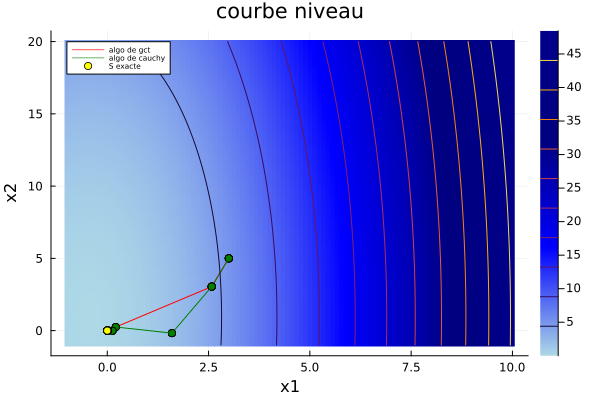

In [1]:
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")
using Plots
fun(x)=(x[1]/5)^2 + (x[2]/3)^2
gfun(x)=[2*x[1]/25;2*x[2]/9]
hfun(x)=[2/25 0;0 2/9]
x0=[3,5]
#courbe de niveaud de f
resolution =100
x1=range(-1,10,length=resolution)
x2=range(-1,20,length=resolution)
tabF=[fun([i,j]) for i in x1, j in x2]
color=[:lightblue, :blue, :navy, :darkblue]
heatmap_plot = heatmap(x1,x2, tabF, c =color, xlabel="x1", ylabel="x2", title ="courbe niveau", legendgontsize=5)

x_sol, f_sol, flag, nb_iters, xs_g = regions_de_confiance(fun,gfun,hfun, x0, algo_pas="gct")
x_sol, f_sol, flag, nb_iters, xs_c = regions_de_confiance(fun,gfun,hfun, x0, algo_pas="cauchy")
pt1= x0
pt2 = xs_g[1]

scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:red, label="algo de gct",legendfontsize=5)
for i in 1:length(xs_g)-1
    pt1=xs_g[i]
    pt2=xs_g[i+1]
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:red, label = false)
    plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:red, label=false)

end

pt1= x0
pt2 = xs_c[1]
scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:green, label = false)
scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:green, label = false)
plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:green, label="algo de cauchy",legendfontsize=5)
for j in 1:length(xs_c)-1
    pt1=xs_c[j]
    pt2=xs_c[j+1]
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:green, label = false)
    scatter!(heatmap_plot,[pt1[1]],[pt1[2]], color=:green, label = false)
    plot!(heatmap_plot,[pt1[1],pt2[1]], [pt1[2], pt2[2]], color=:green, label = false)

end
scatter!(heatmap_plot,[0],[0], color=:yellow , label ="S exacte")

z_matrix= reshape(tabF,length(x1),length(x2))
contour!(heatmap_plot, x1, x2, z_matrix, levels=10)

display(heatmap_plot)

In [54]:
x_sol_cauchy, f_sol_cauchy, _ = regions_de_confiance(fun,gfun,hfun, x0, algo_pas="gct", max_iter_gct = 1, max_iter=1)
x_sol_gct, f_sol_gct, _ = regions_de_confiance(fun,gfun,hfun, x0, algo_pas="cauchy", max_iter=1)

11

([8.0, 0.0], 2.5600000000000005, 3, 1, [[10.0, 0.0], [8.0, 0.0], [8.0, 0.0]])

In [55]:
x_sol_cauchy

2-element Vector{Float64}:
 8.0
 0.0

In [56]:
x_sol_gct

2-element Vector{Float64}:
 8.0
 0.0

In [57]:
f_sol_cauchy

2.5600000000000005

In [58]:
f_sol_gct

2.5600000000000005